In [1]:
require(fastcluster) 
library(TDAmapper)
library(devtools)
library(igraph)

Loading required package: fastcluster

Attaching package: ‘fastcluster’

The following object is masked from ‘package:stats’:

    hclust


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



x,y
-1.7867054,1.6131571
-2.9297442,0.5009081
-2.5261500,-3.1478332
5.1839651,-2.6312171
-0.9884714,1.8175067
4.9949788,-2.8713532
5.7787757,-1.6392512
-0.9392416,-4.4031676
-1.5999694,-4.0281873
0.3198333,1.2883617


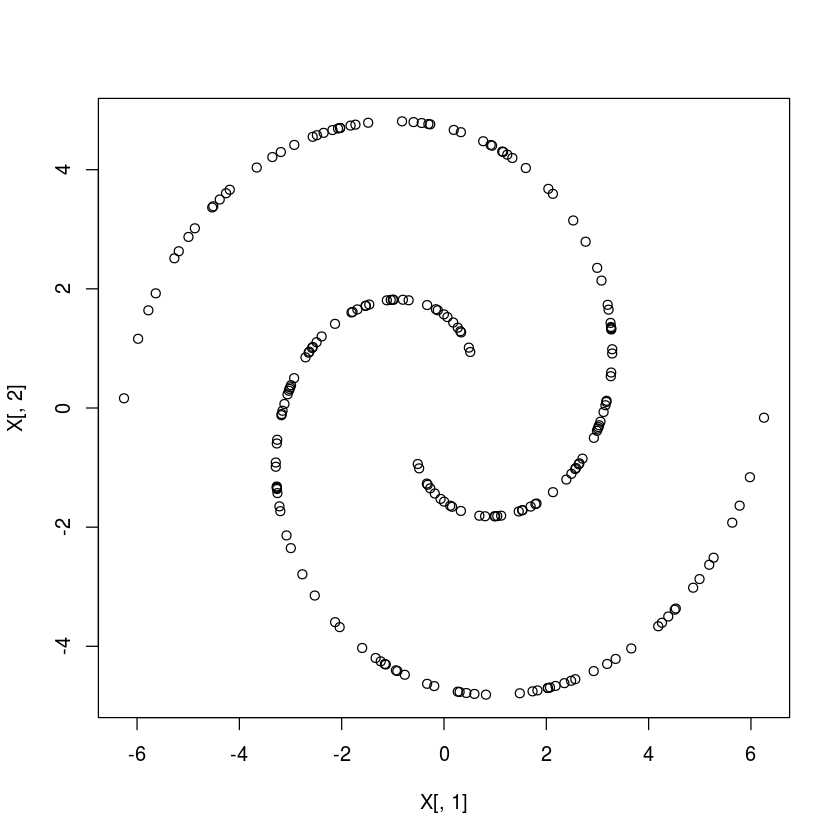

In [15]:
# sample points from two intertwined spirals
set.seed("1")
t <- runif(100, min=1, max=6.3) # theta
X <- data.frame( x = c( t*cos(t), -t*cos(t) ), y = c( t*sin(t), -t*sin(t) ) )
d <- dist(X)
plot(X[,1], X[,2])
X

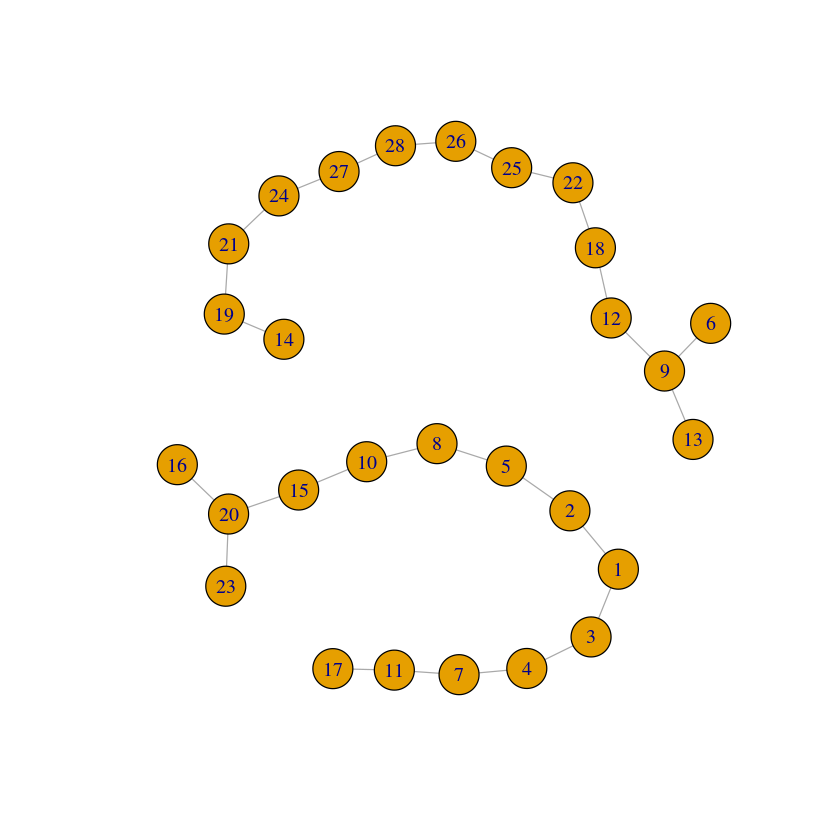

In [9]:
filter <- X[,2] # height projection
num_intervals <- 10
percent_overlap <- 50
num_bins_when_clustering <- 10

m3 <- mapper1D(
	distance_matrix = d, 
	filter_values = filter,	
	# num_intervals = 10, # use default
	# percent_overlap = 50, # use default
	# num_bins_when_clustering = 10 # use default
	)
    
g3 <- graph.adjacency(m3$adjacency, mode="undirected")
plot(g3, layout = layout.auto(g3) )

In [10]:
# parametrize a trefoil knot
n <- 100
t <- 2*pi*(1:n)/n
X <- data.frame(x = sin(t)+2*sin(2*t),
                y = cos(t)-2*cos(2*t),
                z = -sin(3*t))
f <- X

library(rgl)
plot3d(X$x, X$y, X$z)

ERROR: Error in library(rgl): there is no package called ‘rgl’


In [13]:
# use the github version so that vertices stay on the canvas
library(devtools)
devtools::install_github("christophergandrud/networkD3")
library(networkD3)

from URL https://api.github.com/repos/christophergandrud/networkD3/zipball/master
Installing networkD3
'/usr/lib/R/bin/R' --no-site-file --no-environ --no-save --no-restore --quiet  \
  CMD INSTALL  \
  '/tmp/RtmpYukpUP/devtools514f28325bd1/christophergandrud-networkD3-1d217fb'  \
  --library='/home/raula-k/R/x86_64-pc-linux-gnu-library/3.2' --install-tests 



[1] 1

HTML widgets cannot be represented in plain text (need html)

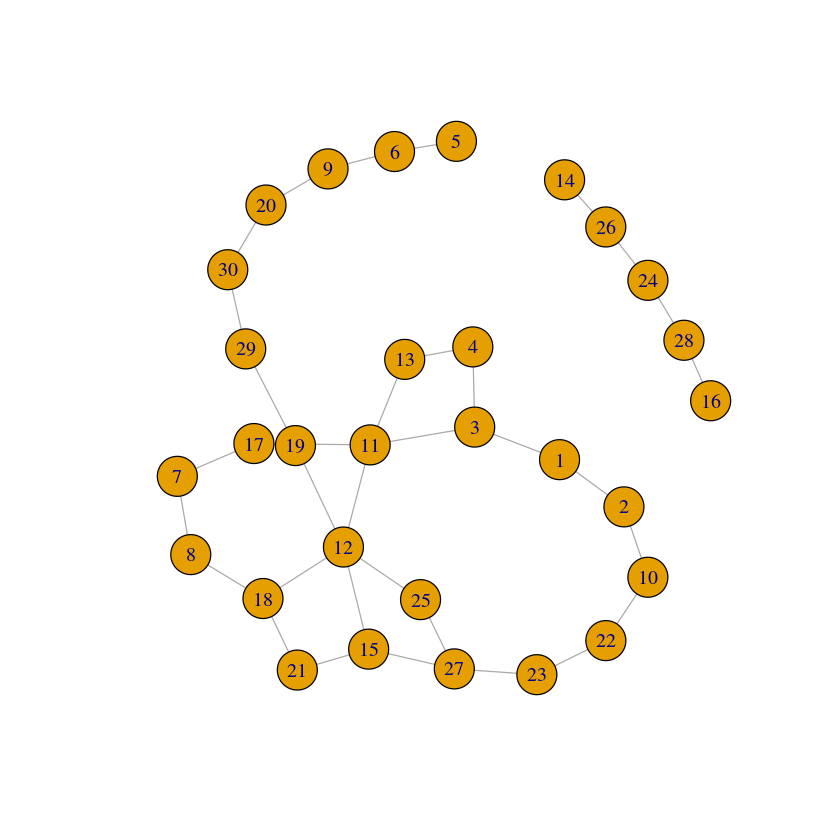

In [14]:
# parametrize a trefoil knot
n <- 100
t <- 2*pi*(1:n)/n
X <- data.frame(x = sin(t)+2*sin(2*t),
                y = cos(t)-2*cos(2*t),
                z = -sin(3*t))
f <- X

m5 <- mapper(dist(X), f, c(3,3,3), c(30,30,30), 5)
g5 <- graph.adjacency(m5$adjacency, mode="undirected")
plot(g5, layout = layout.auto(g5) )
tkplot(g5)

# create data frames for vertices and edges with the right variable names 
MapperNodes <- mapperVertices(m5, 1:dim(f)[1] )
MapperLinks <- mapperEdges(m5)

# interactive plot
forceNetwork(Nodes = MapperNodes, Links = MapperLinks, 
            Source = "Linksource", Target = "Linktarget",
            Value = "Linkvalue", NodeID = "Nodename",
            Group = "Nodegroup", opacity = 0.8, 
            linkDistance = 10, charge = -400)    

